## Rendu Projet MLOps

autrice  
nom : HASSANI               pr√©nom : Youmna

In [ ]:
# Install the following librairies (it is better to create a venv (or conda) virtual environment first and install these librairies in it)
%pip install mlflow
%pip install --upgrade jinja2
%pip install --upgrade Flask
%pip install setuptools

In [1]:
# starts an MLflow server locally.
!mlflow server --host 127.0.0.1 --port 8080

'mlflow' n'est pas reconnu en tant que commande interne
ou externe, un programme exÔøΩcutable ou un fichier de commandes.


In [1]:
from mlflow import MlflowClient
from pprint import pprint
from sklearn.ensemble import RandomForestRegressor


In [82]:
# In order to connect to the tracking server, we‚Äôll need to use the uri that we assigned the server when we started it.

client = MlflowClient(tracking_uri="http://127.0.0.1:8080")

#it allows programmatic interaction with the MLflow tracking server.

In [83]:
all_experiments = client.search_experiments()

print(all_experiments)


[<Experiment: artifact_location='mlflow-artifacts:/180267382028518630', creation_time=1727547737854, experiment_id='180267382028518630', last_update_time=1727547737854, lifecycle_stage='active', name='Logistic_Regression', tags={}>, <Experiment: artifact_location='mlflow-artifacts:/0', creation_time=1727542308053, experiment_id='0', last_update_time=1727542308053, lifecycle_stage='active', name='Default', tags={}>]


In [84]:
import mlflow
from mlflow.tracking import MlflowClient

# Description: Ce script cr√©e une nouvelle exp√©rience dans MLflow pour un projet de r√©gression logistique dans un cadre bancaire.
# L'exp√©rience est associ√©e √† des tags pour faciliter l'organisation et la recherche des runs associ√©s.

# Cr√©er un client MLflow pour interagir avec le serveur MLflow
client = MlflowClient()

# Fournir une description pour l'exp√©rience qui appara√Ætra dans l'interface utilisateur MLflow
experiment_description = (
    "Ceci est un projet de pr√©vision bancaire utilisant des mod√®les de r√©gression logistique. "
    "L'exp√©rience inclut diff√©rents runs et mod√®les entra√Æn√©s pour pr√©dire le comportement bancaire."
)

# Fournir des tags recherchables qui d√©finissent les caract√©ristiques des runs de cette exp√©rience
experiment_tags = {
    "project_name": "Projet Mlops",         # Nom du projet
    "department": "Bbank",                  # D√©partement concern√©
    "team": "stores-ml",                    # √âquipe responsable du projet
    "project_quarter": "Q3-2024",           # P√©riode du projet
    "mlflow.note.content": experiment_description  # Ajouter la description comme une note
}

# Cr√©er une nouvelle exp√©rience MLflow, en fournissant un nom unique
produce_bank_experiment = client.create_experiment(
    name="Bank_Model_Experiment", tags=experiment_tags
)

# D√©finir l'exp√©rience active pour tous les runs futurs dans cette session
mlflow.set_experiment(experiment_id=produce_bank_experiment)

# Confirmer la cr√©ation de l'exp√©rience
print(f"Exp√©rience cr√©√©e avec l'ID : {produce_bank_experiment}")

Exp√©rience cr√©√©e avec l'ID : 412427899084438100


In [85]:

# Rechercher une exp√©rience MLflow en utilisant le tag `project_name`
bank_experiment = client.search_experiments(
    filter_string="tags.`project_name` = 'Projet Mlops'"
)

# Afficher les d√©tails de la premi√®re exp√©rience trouv√©e
print(vars(bank_experiment[0]))


{'_experiment_id': '412427899084438100', '_name': 'Bank_Model_Experiment', '_artifact_location': 'mlflow-artifacts:/412427899084438100', '_lifecycle_stage': 'active', '_tags': {'department': 'Bbank', 'mlflow.note.content': "Ceci est un projet de pr√©vision bancaire utilisant des mod√®les de r√©gression logistique. L'exp√©rience inclut diff√©rents runs et mod√®les entra√Æn√©s pour pr√©dire le comportement bancaire.", 'project_name': 'Projet Mlops', 'project_quarter': 'Q3-2024', 'team': 'stores-ml'}, '_creation_time': 1727597803434, '_last_update_time': 1727597803434}


In [41]:
# importer les biblioth√®ques n√©cessaires au projet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

**1. Chargement des donn√©es**

In [42]:
# Lire le fichier csv de notre projet : collecte de nos donn√©es
df = pd.read_csv("C:/Users/youmn/OneDrive/Bureau/FAC/Master 1/Formation/MLOps/Loan_Data.csv")

**2. Inspection initiale des donn√©es / Exploration des donn√©es**

- Aper√ßu des donn√©es

In [43]:
# Aper√ßu des donnees
print(df.head()) # Afficher les premi√®res lignes
print(df.info()) # Permet de connaitre le type de chaque variable
print(df.shape)  # Permet de connaitre la dimension du dataframe

   customer_id  credit_lines_outstanding  loan_amt_outstanding  \
0      8153374                         0           5221.545193   
1      7442532                         5           1958.928726   
2      2256073                         0           3363.009259   
3      4885975                         0           4766.648001   
4      4700614                         1           1345.827718   

   total_debt_outstanding       income  years_employed  fico_score  default  
0             3915.471226  78039.38546               5         605        0  
1             8228.752520  26648.43525               2         572        1  
2             2027.830850  65866.71246               4         602        0  
3             2501.730397  74356.88347               5         612        0  
4             1768.826187  23448.32631               6         631        0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                 

- Statistiques Descriptives

In [44]:
# on affiche les statistiques descriptives sous forme de tableau
statistiques_descriptives = df.describe()
print(statistiques_descriptives)  # Afficher les statistiques descriptives

        customer_id  credit_lines_outstanding  loan_amt_outstanding  \
count  1.000000e+04              10000.000000          10000.000000   
mean   4.974577e+06                  1.461200           4159.677034   
std    2.293890e+06                  1.743846           1421.399078   
min    1.000324e+06                  0.000000             46.783973   
25%    2.977661e+06                  0.000000           3154.235371   
50%    4.989502e+06                  1.000000           4052.377228   
75%    6.967210e+06                  2.000000           5052.898103   
max    8.999789e+06                  5.000000          10750.677810   

       total_debt_outstanding         income  years_employed    fico_score  \
count            10000.000000   10000.000000    10000.000000  10000.000000   
mean              8718.916797   70039.901401        4.552800    637.557700   
std               6627.164762   20072.214143        1.566862     60.657906   
min                 31.652732    1000.000000    

*Decription des Variables de Notre Jeu de Donn√©es*

- **customer_id** : Identifiant unique pour chaque client. Utile pour indexer les donn√©es mais ne contient aucune information analytique intrins√®que.  
- **credit_lines_outstanding** : Nombre de lignes de cr√©dit actives. Peut √™tre trait√©e comme num√©rique ou cat√©gorique si le nombre de lignes est faible.  
- **loan_amt_outstanding** : Montant total en cours sur les pr√™ts actifs. Une variable cl√© pour analyser le comportement de cr√©dit.  
- **total_debt_outstanding** : Montant total de la dette actuelle du client. Crucial pour l'√©valuation du risque financier.
- **income** : Revenu annuel du client. Important pour les mod√®les pr√©dictifs li√©s √† la capacit√© de paiement.  
- **years_employed** : Nombre d'ann√©es d'emploi. Indique la stabilit√© de l'emploi, souvent li√©e √† la fiabilit√© de remboursement.  
- **fico_score** : Score FICO du client, un indicateur cl√© de la sant√© cr√©dit.  
- **default** : Indicateur binaire (0 ou 1) si le client a fait d√©faut sur un pr√™t. Variable cible typique pour les mod√®les de pr√©diction de d√©faut.

**3. Nettoyage Des Donn√©es**

- Traitement des valeurs manquantes

In [45]:
# Identifier les valeurs manquantes
missing_percentage = df.isnull().mean() * 100 # Calculer le pourcentage de valeurs manquantes pour chaque colonne
print(missing_percentage) # Afficher le pourcentage de valeurs manquantes

customer_id                 0.0
credit_lines_outstanding    0.0
loan_amt_outstanding        0.0
total_debt_outstanding      0.0
income                      0.0
years_employed              0.0
fico_score                  0.0
default                     0.0
dtype: float64


Commentaires :   Le dataframe ne contient pas de valeurs manquantes, par cons√©quent le traitement des valeurs manquantes est d√©sormais termin√©e

- Traitement des valeurs ab√©rrantes

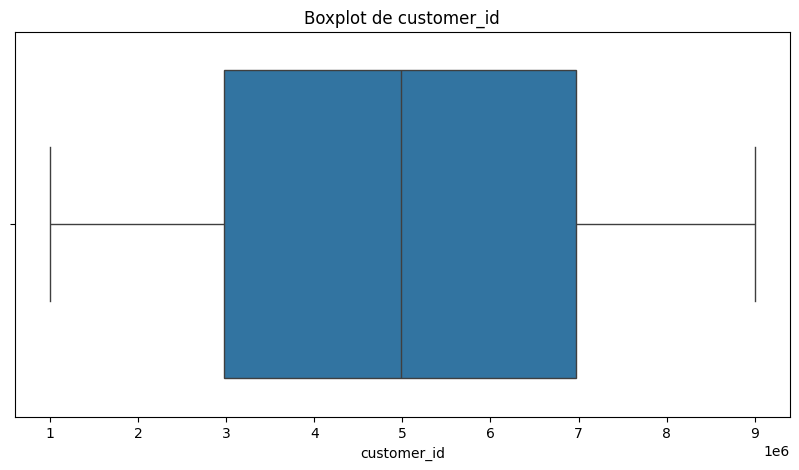

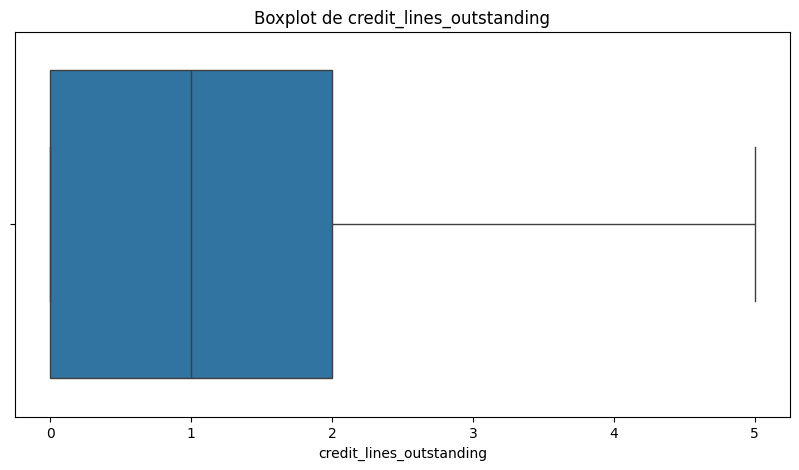

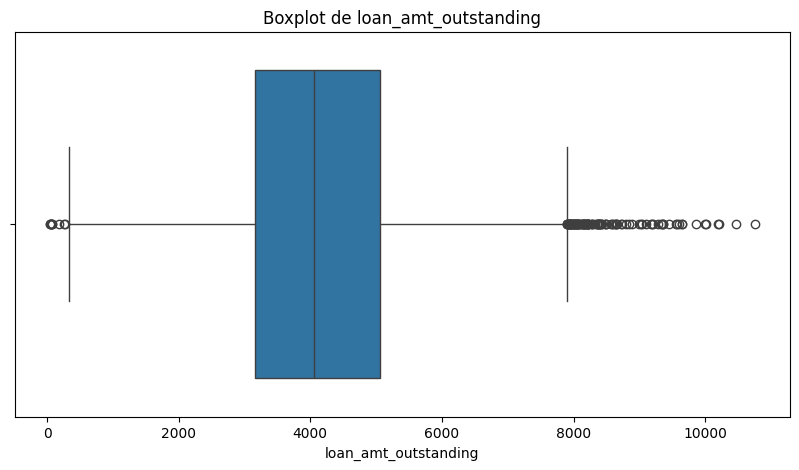

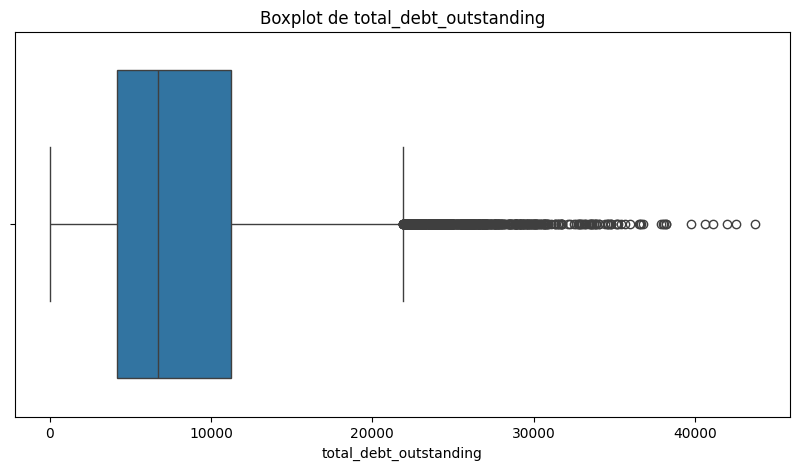

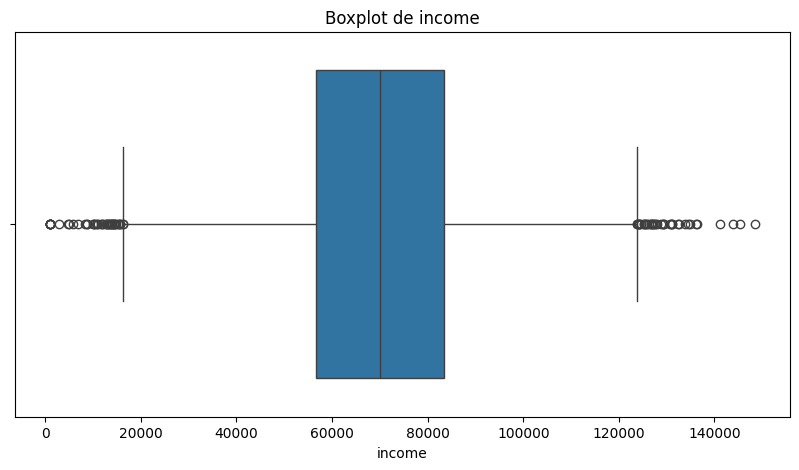

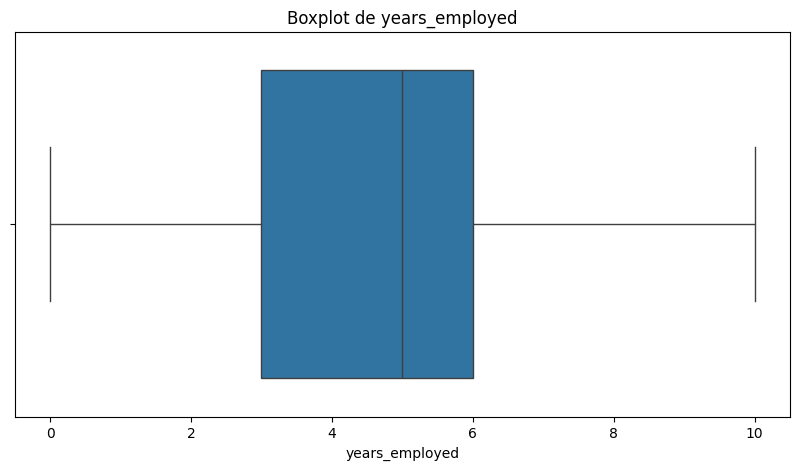

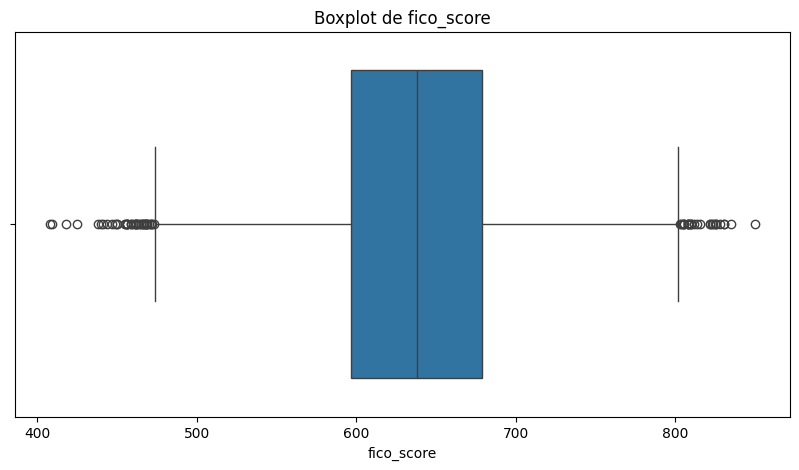

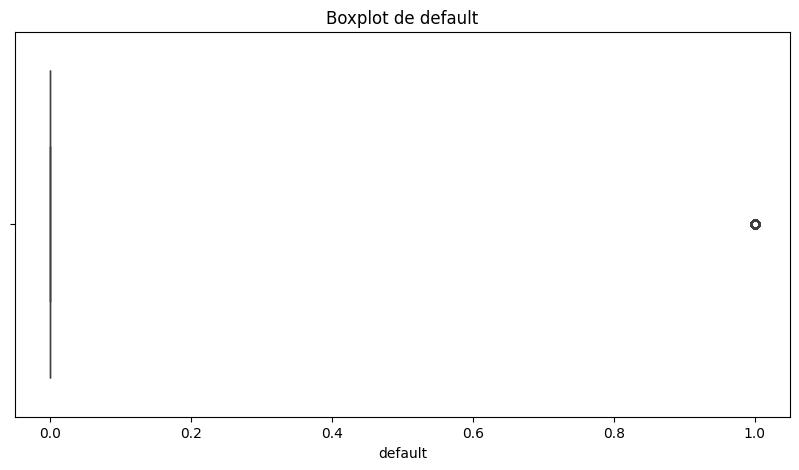

In [46]:
# Cr√©er un boxplot pour chaque colonne num√©rique : visualisation des valeurs manquantes
# via la m√©thode de Box Plot
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot de {column}')
    plt.show()

*Commentaires* : la variable *default* est une variable avec des valeurs num√©riques (1 ou 0) mais se comporte comme une variable cat√©gorielle, cela explique pourquoi il n'y a pas de box plot qui s'affiche pour cette variable. Pour ce faire, nous allons analyser le nombre de valeurs uniques pour chaque variables de notre dataframe.

In [47]:
# traitement des valeurs manquantes via la m√©thode de l'√©cart interquartile (IQR)

# Calcul de l'IQR et filtrage des valeurs aberrantes
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Filtrer les valeurs aberrantes
df_filtered = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_filtered.shape)  # Afficher la nouvelle dimension apr√®s filtrage


(7982, 8)


In [48]:
# Comptage des valeurs uniques pour chaque colonne ;
# cela nous permet de mieux classer par la suite les variables
# en fonction de son type
print(df.nunique())

customer_id                 10000
credit_lines_outstanding        6
loan_amt_outstanding        10000
total_debt_outstanding      10000
income                       9995
years_employed                 11
fico_score                    374
default                         2
dtype: int64


- Suppression des doublons

In [49]:
df = df.drop_duplicates()
print(df.shape)
print(df.columns)

(10000, 8)
Index(['customer_id', 'credit_lines_outstanding', 'loan_amt_outstanding',
       'total_debt_outstanding', 'income', 'years_employed', 'fico_score',
       'default'],
      dtype='object')


A partir des valeurs uniques, nous constatons que 3 variables n'ont pas beaucoup de valeurs diff√©rentes, ce qui nous permets de scinder en deux groupes distincts : les variables continues que nous nommerons numerical_var et les variables class√©es par cat√©gories qui sont class√©es dans categorical_var.  
La variable default est la variable cible de notre dataframe.

- *Analyse des Relations entre Variables*

In [50]:
numerical_vars = ['customer_id', 'loan_amt_outstanding', 'total_debt_outstanding', 'income', 'fico_score']
categorical_vars = ['credit_lines_outstanding', 'years_employed', 'default']

C:\Users\youmn\AppData\Local\Temp\ipykernel_19520\3117066698.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[var], palette='viridis')  # Utilisation de la palette 'viridis' pour des couleurs vives


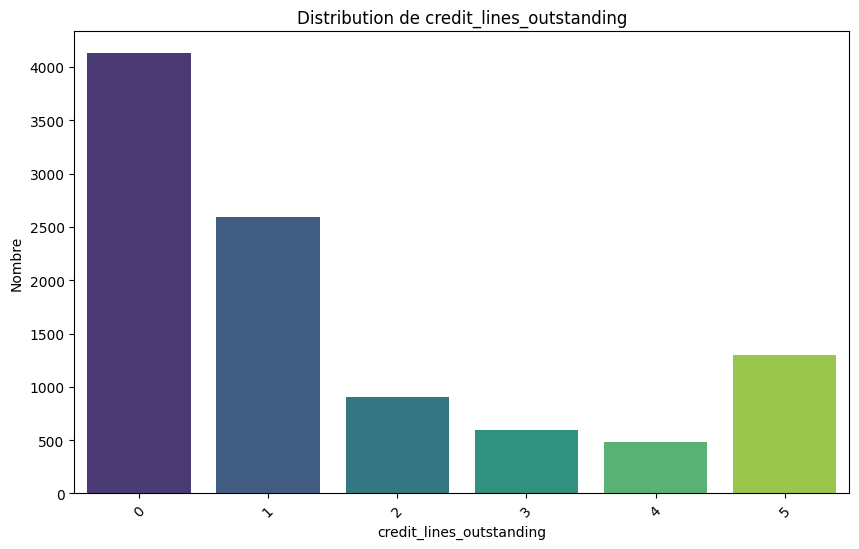

C:\Users\youmn\AppData\Local\Temp\ipykernel_19520\3117066698.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[var], palette='viridis')  # Utilisation de la palette 'viridis' pour des couleurs vives


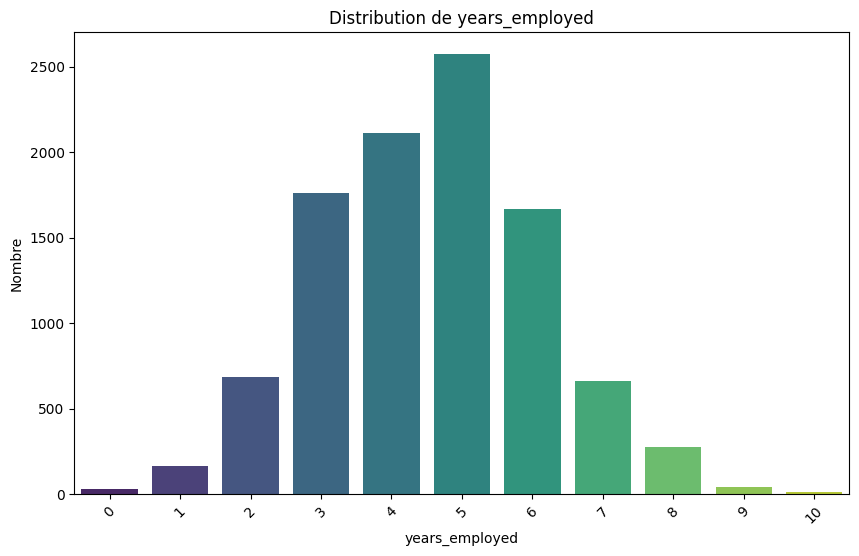

C:\Users\youmn\AppData\Local\Temp\ipykernel_19520\3117066698.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[var], palette='viridis')  # Utilisation de la palette 'viridis' pour des couleurs vives


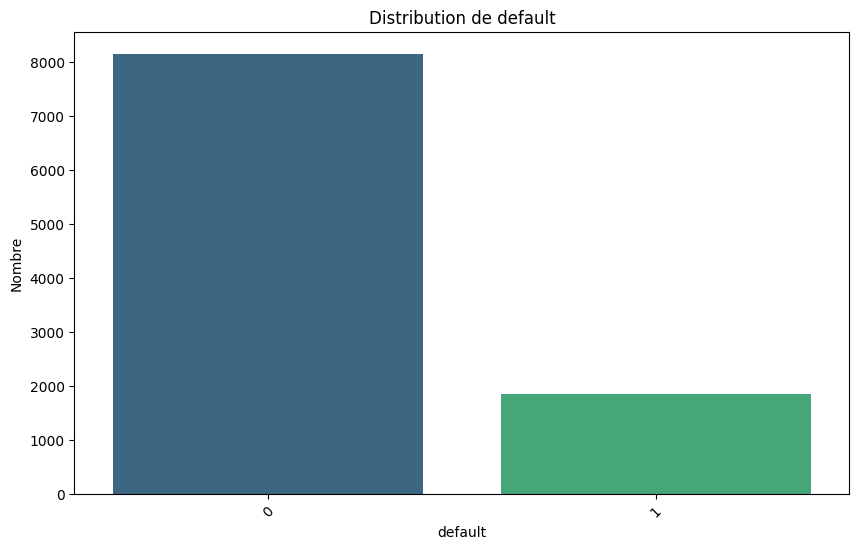

In [51]:
# Cr√©ation des graphiques en barres
for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=df[var], palette='viridis')  # Utilisation de la palette 'viridis' pour des couleurs vives
    plt.title(f'Distribution de {var}')
    plt.xlabel(var)
    plt.ylabel('Nombre')
    plt.xticks(rotation=45)  # Rotation des √©tiquettes si n√©cessaire
    plt.show()

*Commentaires*

- Concernant la variable **credit_lines_outstanding** :  

La distribution des lignes de cr√©dit en coures r√©v√®le une nette concentration sur les comptes √† faible endettement, avec une d√©croissance marqu√©e √† mesure que le nombre de lignes augmente, √† l'exception d'un pic notable pour 5 lignes de cr√©dit.  
Pr√©dominance des comptes √† 0-1 ligne de cr√©dit sugg√©rant une client√®le majoritairement prudente ou √† acc√®s limit√© au cr√©dit.  
D√©croissance rapide du nombre de clients  avec l'augmentation des lignes de cr√©dit, indiquant potentiellement des crit√®res d'octroi plus stricts pour les cr√©dits multiples.  
Anomalie int√©ressante √† 5 lignes de cr√©dit, qui pourrait refl√©ter une politique sp√©cifique de l'institution ou un segment de client√®le particulier.

Cette distribution asym√©trique, avec une forte concentration sur les faibles nombres de lignes de cr√©dit, souligne l'importance d'une analyse approfondie des facteurs influen√ßant l'acc√®s et l'utilisation du cr√©dit par la client√®le. Elle pourrait√©galement impliquer des strat√©gies de gestion des risques diff√©renci√©es selon le nombre de lignes de cr√©dit d√©tenues par les clients.

- Concernant la variable **years_employed** :  

La distribution des ann√©es d'emploi r√©v√®le une structure complexe de la stabilit√© professionnelle de la client√®le, caract√©ris√©e par une concentration mod√©r√©e et des extr√™mes moins repr√©sent√©s.
Concentration autour de 5-6 ans d'emploi, sugg√©rant une base de clients avec une stabilit√© professionnelle mod√©r√©e.  
Faible repr√©sentation des employ√©s tr√®s r√©cents (0-2 ans) et de longue date (9-10 ans), indiquant une client√®le principalement compos√©e de travailleurs en milieu de carri√®re.  
D√©croissance progressive apr√®s 6 ans d'emploi, pouvant refl√©ter une certaine mobilit√© professionnelle ou des changements de carri√®re dans la population √©tudi√©e.  

Cette distribution asym√©trique met en lumi√®re l'importance de consid√©rer la dur√©e d'emploi comme un facteur cl√© dans l'√©valuation des risques de cr√©dit et la personnalisation des offres financi√®res. Elle sugg√®re √©galement la n√©cessit√© d'une approche nuanc√©e dans la gestion des relations clients, prenant en compte les diff√©rents stades de carri√®re et leurs implications sur la stabilit√© financi√®re.

- Concernant la variable **default** :   

Pr√©valence des Clients sans D√©faut :  
La majorit√© des clients dans votre base de donn√©es n'ont pas fait d√©faut sur leurs pr√™ts (repr√©sent√©s par 0). Cela indique une sant√© financi√®re g√©n√©rale favorable au sein de votre client√®le et sugg√®re que les crit√®res de s√©lection et de qualification des cr√©dits sont globalement efficaces.  

Existence d'un Risque de D√©faut :  
Une proportion notable de clients a fait d√©faut (repr√©sent√©s par 1). Bien que cet √©chantillon soit minoritaire, il souligne la n√©cessit√© de surveiller attentivement ce segment, car il repr√©sente un risque financier potentiel pour votre portefeuille de pr√™ts.  
Nous observons √©galement un d√©s√©quilibre des classes, ce qui est important √† prendre en compte dans le cadre du choix de la m√©trique.

Nous obtenons une forte disparit√© entre les classes √† propos de notre variable cible (default). Un tel d√©s√©quilibre dans les classes peut biaiser le mod√®le pr√©dictif vers la classe majoritaire, ce qui r√©duit la capacit√© du mod√®le √† identifier correctement les cas de d√©faut, qui sont moins fr√©quents mais souvent plus importants √† pr√©dire.

**Objectif** : Afin d'am√©liorer la performance des mod√®les sur la classe minoritaire et de r√©duire le biais vers la classe majoritaire, nous appliquons la technique de sur-√©chantillonnage SMOTE. Cette m√©thode permet de g√©n√©rer synth√©tiquement de nouvelles instances de la classe minoritaire pour atteindre un √©quilibre entre les classes.

**M√©thodologie** :

Apr√®s avoir analys√© les donn√©es, nous avons constat√© que le jeu de donn√©es est d√©s√©quilibr√©, avec une classe majoritaire (non-d√©faut : 80%) et une classe minoritaire (d√©faut : 20%). Pour √©quilibrer les donn√©es, nous allons utiliser la technique de r√©√©chantillonnage.

Contenu du d√©s√©quilibre des classes, nous avons consid√©r√© les Techniques de r√©√©chantillonnage suivantes :

- *Surl√©chantillonnage al√©atoire (Random Oversampling)* : Cette technique consiste √† dupliquer al√©atoirement les observations de la classe minoritaire pour √©quilibrer les effectifs.  
- *Sous-√©chantillonnage al√©atoire (Random Undersampling)* : Cette technique consiste √† supprimer al√©atoirement les observations de la classe majoritaire pour √©quilibrer les effectifs.  
- *SMOTE (Synthetic Minority Over-sampling Technique)* : Cette technique consiste √† g√©n√©rer de nouvelles observations synth√©tiques de la classe minoritaire en interpolant les observations existantes.  

Choix de la technique de r√©√©chantillonnage  

Apr√®s avoir analys√© les donn√©es, nous avons d√©cid√© d'utiliser la technique de SMOTE pour √©quilibrer les donn√©es. Cette technique est particuli√®rement adapt√©e pour les jeux de donn√©es d√©s√©quilibr√©s avec une classe minoritaire importante.

Nous avons choisi la technique de SMOTE pour les raisons suivantes :

Pr√©servation de l'information : La technique de SMOTE pr√©serve l'information contenue dans les observations de la classe minoritaire en g√©n√©rant de nouvelles observations synth√©tiques qui sont proches des observations existantes.
√âvitement de la perte d'information : La technique de SMOTE √©vite la perte d'information qui peut survenir lors de la suppression d'observations de la classe majoritaire.
Am√©lioration de la pr√©cision : La technique de SMOTE peut am√©liorer la pr√©cision des mod√®les de classification en fournissant un √©chantillon plus repr√©sentatif de la classe minoritaire.

**4. Transformation des Donn√©es**

*Commentaires*  

*Variables Num√©riques*  
- **customer_id** : c'est une variable repr√©sentant un identifiant unique pour chaque client, il est alors exclu des features car il ne contient pas d'information pr√©dictive

- **loan_amt_outstanding** : montant total en cours sur les pr√™ts actifs, utilis√© pour √©valuer l'exposition au risque financier, c'est une variable de type num√©rique (flottant), nous n'avons alors pas besoin de proc√©der √† l'encoding.

- **total_debt_outstanding** : montant total de la dette actuelle, crucial pour l'√©valuation du risque de cr√©dit, c'est une variable de type num√©rique (flottant), nous n'avons alors pas besoin de proc√©der √† l'encoding.

- **total_debt_outstanding** : montant total de la dette actuelle, crucial pour l'√©valuation du risque de cr√©dit, c'est une variable de type num√©rique (flottant), nous n'avons alors pas besoin de proc√©der √† l'encoding.

- **income** : revenu annuel, important pour les mod√®les pr√©dictifs relatifs √† la capacit√© de paiement, c'est une variable de type num√©rique (flottant), nous n'avons alors pas besoin de proc√©der √† l'encoding.

- **fico_score** : score FICO du client, un indicateur direct de la sant√© cr√©dit, c'est une variable de type num√©rique (entier), nous n'avons alors pas besoin de proc√©der √† l'encoding.  

*Variables de Types Cat√©gorielles*  


Analyse Statistique dans le cas des Variables Cat√©gorielles

- Analyser la Corr√©lation

In [52]:
# Calculer la corr√©lation
correlation = df['credit_lines_outstanding'].corr(df['default'])
print(f"Corr√©lation entre le nombre de lignes de cr√©dit et d√©faut : {correlation}")

Corr√©lation entre le nombre de lignes de cr√©dit et d√©faut : 0.8628152536592015


*Commentaires*  
La corr√©lation est tr√®s √©lev√©e, sugg√©rant une forte relation positive entre le nombre de lignes de cr√©dit et la probabilit√© de d√©faut. Cela signifie que lorsque le nombre de lignes de cr√©dit augmente, la probabilit√© de d√©faut tend √©galement √† augmenter.

In [53]:
# Calculer la corr√©lation
correlation = df['years_employed'].corr(df['default'])
print(f"Corr√©lation entre le nombre d'ann√©es d'emploi du client et d√©faut : {correlation}")

Corr√©lation entre le nombre d'ann√©es d'emploi du client et d√©faut : -0.2845056991032378


*Commentaires*  
Une corr√©lation n√©gative indique que les deux variables √©voluent en sens oppos√©s. Dans ce cas, √† mesure que le nombre d'ann√©es d'emploi augmente, la probabilit√© de d√©faut diminue. Cela sugg√®re que les clients qui ont √©t√© employ√©s plus longtemps sont moins susceptibles de faire d√©faut sur leurs pr√™ts.

- Visualisation

C:\Users\youmn\AppData\Local\Temp\ipykernel_19520\2406401764.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='credit_lines_outstanding', y='default', data=df, ci=None)


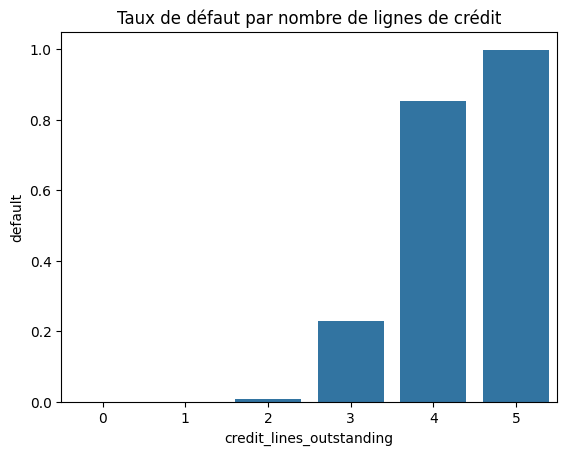

In [54]:
# Diagramme √† barres de la moyenne de d√©faut par nombre de lignes de cr√©dit
sns.barplot(x='credit_lines_outstanding', y='default', data=df, ci=None)
plt.title('Taux de d√©faut par nombre de lignes de cr√©dit')
plt.show()

*Commentaires*  
Le graphique montre une augmentation claire et constante du taux de d√©faut √† mesure que le nombre de lignes de cr√©dit augmente

**Relation entre Deux Variables Cat√©gorielles**    
- Test du Khi-Deux : Utilis√© pour tester l'ind√©pendance entre deux variables cat√©gorielles. Ce test permet de d√©terminer si les variables sont li√©es ou non.  
- **Hypoth√®se Nulle** : Les deux variables sont ind√©pendantes  
- **Hypoth√®se Alternative** : Les deux variables sont li√©es  
- **Statistique de Test** : La statistique du Khi-Deux suit une loi de Khi-Deux avec un certain degr√© de libert√©.

In [56]:
import pandas as pd
from scipy.stats import chi2_contingency

# Liste des variables cat√©gorielles √† tester contre la variable cible 'default'
categorical_vars = ['credit_lines_outstanding', 'years_employed']

# Variable cible
target_var = 'default'

# Boucle pour effectuer le test du Khi-Deux sur chaque variable cat√©gorielle par rapport √† la variable cible
for var in categorical_vars:
    # Cr√©ez un tableau de contingence entre la variable cat√©gorielle et la variable cible
    contingency_table = pd.crosstab(df[var], df[target_var])
    
    # Effectuez le test du Khi-Deux
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Affichez les r√©sultats avec une v√©rification pour les p-values tr√®s faibles
    if p < 1e-10:  # Si la p-value est tr√®s proche de z√©ro
        print(f"Test du Khi-Deux entre {var} et {target_var}:")
        print(f"Chi2 Statistic: {chi2}, p-value: < 1e-10 (tr√®s faible)\n")
    else:
        print(f"Test du Khi-Deux entre {var} et {target_var}:")
        print(f"Chi2 Statistic: {chi2}, p-value: {p}\n")

Test du Khi-Deux entre credit_lines_outstanding et default:
Chi2 Statistic: 8833.861690832404, p-value: < 1e-10 (tr√®s faible)

Test du Khi-Deux entre years_employed et default:
Chi2 Statistic: 894.1442625944401, p-value: < 1e-10 (tr√®s faible)



*Commentaires*  
Puisque les p-values sont tr√®s proches de z√©ro pour les deux tests, nous rejetons l'hypoth√®se nulle (H0) avec un haut niveau de confiance.
Cela signifie qu'il existe une association statistiquement significative entre credit_lines_outstanding et default, ainsi qu'entre years_employed et default.  
Il existe alors une relation tr√®s significative entre le nombre de lignes de cr√©dit, le nombre d'ann√©es d'emploi et le d√©faut de paiement.
Ces r√©sultats sugg√®rent que ces variables cat√©gorielles sont des pr√©dicteurs importants pour la variable cible default.

Relation entre les Variables Quantitatives

In [57]:
import pandas as pd

# Liste des variables num√©riques
numerical_vars = ['loan_amt_outstanding', 'total_debt_outstanding', 'income', 'fico_score']

# Variable cible
target_var = 'default'

# suppression de la la variable customer_id
df = df.drop('customer_id', axis=1)


# Cr√©ez un DataFrame avec les variables num√©riques et la variable cible
data = df[numerical_vars + [target_var]]

# Calculez la corr√©lation entre chaque variable num√©rique et la variable cible
correlation = data.corr()[target_var].drop(target_var)

# Affichez le tableau de corr√©lation
print(correlation)


loan_amt_outstanding      0.098978
total_debt_outstanding    0.758868
income                    0.016309
fico_score               -0.324515
Name: default, dtype: float64


In [58]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# S√©parer les features (X) et la target (y)
X = df.drop('default', axis=1)
y = df['default']

# Appliquer SMOTE avant l'encodage
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Cr√©er un nouveau DataFrame avec les donn√©es r√©√©chantillonn√©es
df_resampled = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled, columns=['default'])], axis=1)

# Fonction de binning pour years_employed
def bin_years_employed(years):
    if years <= 2:
        return '0-2 years'
    elif years <= 5:
        return '3-5 years'
    elif years <= 8:
        return '6-8 years'
    else:
        return '9+ years'

# Initialiser l'encodeur One-Hot
onehot_encoder = OneHotEncoder(handle_unknown='ignore')

# Encodage des variables cat√©gorielles
df_resampled['years_employed_binned'] = df_resampled['years_employed'].apply(bin_years_employed)
years_employed_encoded = onehot_encoder.fit_transform(df_resampled[['years_employed_binned']]).toarray()
years_employed_columns = [f'years_employed_{cat}' for cat in onehot_encoder.categories_[0]]

credit_lines_encoded = onehot_encoder.fit_transform(df_resampled[['credit_lines_outstanding']]).toarray()
credit_lines_columns = [f'credit_lines_{cat}' for cat in onehot_encoder.categories_[0]]

# Ajouter les colonnes encod√©es au DataFrame
df_resampled = pd.concat([
    df_resampled,
    pd.DataFrame(years_employed_encoded, columns=years_employed_columns),
    pd.DataFrame(credit_lines_encoded, columns=credit_lines_columns),
], axis=1)

# Supprimer les colonnes originales
df_resampled.drop(['years_employed', 'years_employed_binned', 'credit_lines_outstanding'], axis=1, inplace=True)

# Ajouter ou conserver les variables num√©riques
numerical_vars = ['loan_amt_outstanding', 'total_debt_outstanding', 'income', 'fico_score']
for var in numerical_vars:
    df_resampled[var] = df_resampled[var]  # Indentation corrected here

# Cr√©er de nouvelles features
df_resampled['loan_to_income_ratio'] = df_resampled['loan_amt_outstanding'] / df_resampled['income']
df_resampled['debt_to_income_ratio'] = df_resampled['total_debt_outstanding'] / df_resampled['income']

# Diviser les donn√©es en ensembles d'entra√Ænement et de test en stratifiant par la target
X_train, X_test, y_train, y_test = train_test_split(df_resampled.drop('default', axis=1), df_resampled['default'], test_size=0.2, stratify=df_resampled['default'], random_state=42)

# V√©rification des shapes pour s'assurer que la segmentation s'est bien d√©roul√©e
print("\nShape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# V√©rifier la distribution des classes dans les ensembles d'entra√Ænement et de test
print("\nDistribution de la target dans y_train:")
print(y_train.value_counts(normalize=True))
print("\nDistribution de la target dans y_test:")
print(y_test.value_counts(normalize=True))



Shape of X_train: (13038, 16)
Shape of X_test: (3260, 16)
Shape of y_train: (13038,)
Shape of y_test: (3260,)

Distribution de la target dans y_train:
default
0    0.5
1    0.5
Name: proportion, dtype: float64

Distribution de la target dans y_test:
default
1    0.5
0    0.5
Name: proportion, dtype: float64


v√©rifier le type de distribution de chaque variable num√©rique afin de tester par la suite l'ind√©pendance des variables explicatives avec la variable cible.

C:\Users\youmn\AppData\Local\Temp\ipykernel_19520\622040096.py:14: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10000.
  stat, p = shapiro(df[var])


Test de Shapiro-Wilk pour loan_amt_outstanding:
Statistic: 0.9902148180946146, p-value: 1.1966955270764187e-25



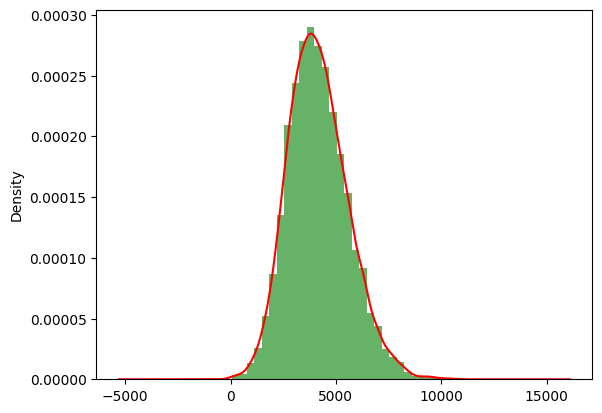

C:\Users\youmn\AppData\Local\Temp\ipykernel_19520\622040096.py:14: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10000.
  stat, p = shapiro(df[var])


Test de Shapiro-Wilk pour total_debt_outstanding:
Statistic: 0.8720951714043387, p-value: 3.0757379686036756e-67



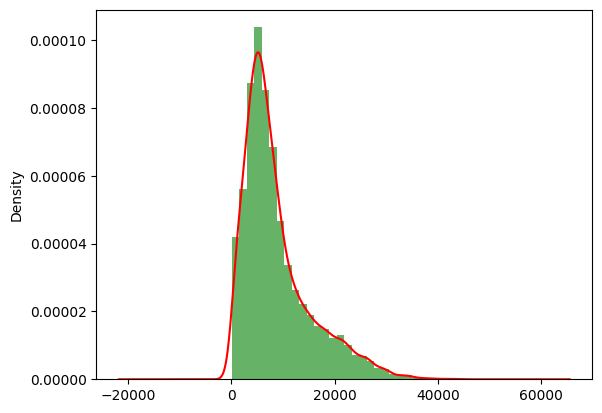

C:\Users\youmn\AppData\Local\Temp\ipykernel_19520\622040096.py:14: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10000.
  stat, p = shapiro(df[var])


Test de Shapiro-Wilk pour income:
Statistic: 0.9997881523672706, p-value: 0.4432160628378845



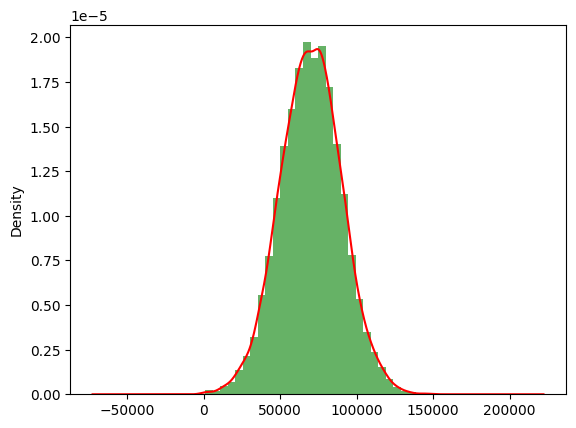

C:\Users\youmn\AppData\Local\Temp\ipykernel_19520\622040096.py:14: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10000.
  stat, p = shapiro(df[var])


Test de Shapiro-Wilk pour fico_score:
Statistic: 0.9994488198293282, p-value: 0.0034398178024427867



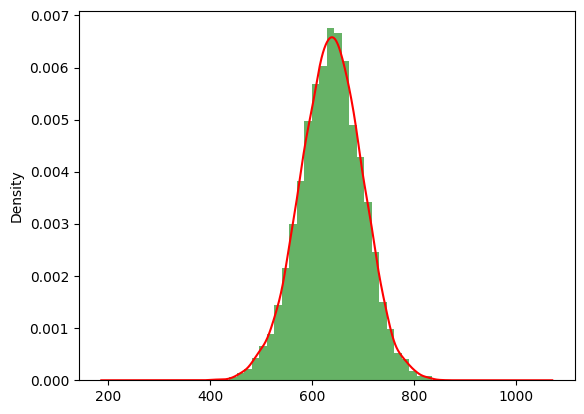

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro

# Liste des variables num√©riques
numerical_vars = ['loan_amt_outstanding', 'total_debt_outstanding', 'income', 'fico_score']

# Boucle pour tracer un histogramme et effectuer le test de Shapiro-Wilk sur chaque variable num√©rique
for var in numerical_vars:
    # Tracez un histogramme de la variable num√©rique
    plt.hist(df[var], bins=30, density=True, alpha=0.6, color='g')

    # Effectuez le test de Shapiro-Wilk
    stat, p = shapiro(df[var])

    # Affichez les r√©sultats
    print(f"Test de Shapiro-Wilk pour {var}:")
    print(f"Statistic: {stat}, p-value: {p}\n")

    # Ajoutez une ligne de densit√© √† l'histogramme
    df[var].plot(kind='density', color='red')

    # Affichez le graphique
    plt.show()


*Commentaires*  
Le test de Shapiro-Wilk est utilis√© pour √©valuer la normalit√© d'une distribution de donn√©es, c'est-√†-dire pour tester si une variable suit une distribution normale (gaussienne).  

**Hypoth√®ses du Test de Shapiro-Wilk**  
- *Hypoth√®se Nulle (H0)*: La variable suit une distribution normale.
- *Hypoth√®se Alternative (HA)*: La variable ne suit pas une distribution normale.

- Concernant la variable **loan_amt_outstanding** :  
La valeur de la statistique de test est tr√®s proche de 1, ce qui indique que les donn√©es sont assez proches d'une distribution normale. Plus cette valeur est proche de 1, plus la courbe des donn√©es ressemble √† une courbe normale.  
Bien que la statistique de test sugg√®re une proximit√© avec la distribution normale, la tr√®s faible p-value et l'avertissement concernant la pr√©cision de cette derni√®re pour les grands √©chantillons indiquent que vous devriez √™tre prudent avant de conclure d√©finitivement √† une non-normalit√© des donn√©es.

- Concernant la variable **total_debt_outstanding** :  
La valeur de la statistique de Shapiro-Wilk inf√©rieure √† 1, surtout aussi √©loign√©e de 1 (0.872), indique une divergence notable par rapport √† une distribution normale.  
La p-value extr√™mement faible (pratiquement 0) permet de rejeter avec confiance l'hypoth√®se nulle de normalit√©. Cela signifie que la distribution des donn√©es total_debt_outstanding n'est pas normale

- Concernant la variable **income** :  
Une valeur tr√®s proche de 1 (0.999788) indique que la distribution des donn√©es se rapproche √©troitement d'une distribution normale, du moins selon la m√©trique utilis√©e par le test de Shapiro-Wilk.  
Une p-value inf√©rieure √† 0.05 (typiquement le seuil pour rejeter l'hypoth√®se nulle) sugg√®re que nous ne sommes pas en mesure de rejeter l'hypoth√®se nulle , c'est-√†-dire que income suit une distribution normale. Ainsi, selon ce test, il n'y a pas de preuves suffisantes pour affirmer que les donn√©es ne sont pas normales.

- Concernant la variable **fico_score** :  
La statistique de test tr√®s proche de 1 indique que les donn√©es sont presque parfaitement normales. Cependant, elle ne l'est pas compl√®tement, comme le montre la p-value.
Une p-value inf√©rieure au seuil conventionnel de 0.05 (ici, 0.0034) sugg√®re que nous devrions rejeter l'hypoth√®se nulle. Cela signifie que, selon le test de Shapiro-Wilk, fico_score pr√©sente des √©carts statistiquement significatifs par rapport √† une distribution normale.

On r√©alise plusieurs tests diff√©rents pour constater si la distribution de cette variable est normale ou pas (ce sont des tests de v√©rifications)

In [60]:
from scipy.stats import anderson

result = anderson(df['loan_amt_outstanding'], dist='norm')
print("Statistic:", result.statistic)
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print(f"At {sl}% level, data looks normal (statistic < critical value).")
    else:
        print(f"At {sl}% level, data does not look normal (statistic > critical value).")


Statistic: 21.852943170551953
At 15.0% level, data does not look normal (statistic > critical value).
At 10.0% level, data does not look normal (statistic > critical value).
At 5.0% level, data does not look normal (statistic > critical value).
At 2.5% level, data does not look normal (statistic > critical value).
At 1.0% level, data does not look normal (statistic > critical value).


*Commentaires*  
Le test d'Anderson-Darling est particuli√®rement sensible aux √©carts dans les queues de la distribution par rapport √† une distribution normale. Le fait que les donn√©es √©chouent √† tous les niveaux de signification indique fortement que la distribution des montants de pr√™t en cours n'est pas normale.

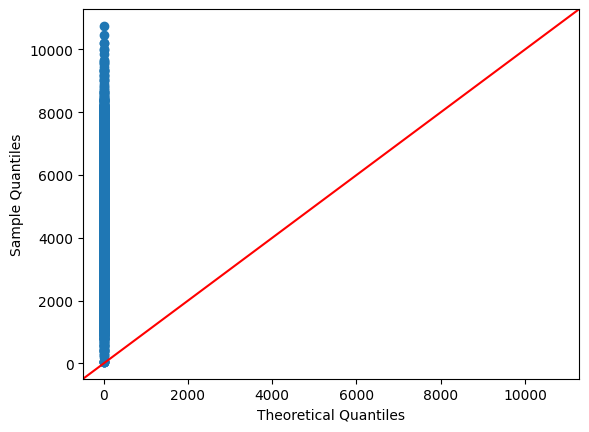

In [61]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

sm.qqplot(df['loan_amt_outstanding'], line ='45')
plt.show()


*Commentaires*  
Les points du graphique sont tr√®s √©loign√©s de la ligne rouge, surtout pour les quantiles inf√©rieurs, et ne suivent pas la tendance lin√©aire pr√©vue pour une distribution normale. Les points forment une courbe prononc√©e au d√©part puis s'√©loignent de la ligne sur les extr√©mit√©s.  
L'√©cart consid√©rable aux deux extr√©mit√©s de la distribution indique que les donn√©es ont des queues lourdes compar√©es √† une distribution normale. Cela signifie que nous avons plus d'observations avec des valeurs extr√™mes (tr√®s basses ou tr√®s hautes) que ce que l'on attendrait dans une distribution normale.

**Hypoth√®ses du Test d'Anderson-Darling**  
- *Hypoth√®se Nulle (H0)*: La distribution de la variable total_debt_outstanding suit une distribution normale.
- *Hypoth√®se Alternative (H1)*: La distribution de la variable total_debt_outstanding ne suit pas une distribution normale.

In [62]:
from scipy.stats import anderson

result = anderson(df['total_debt_outstanding'], dist='norm')
print("Statistic:", result.statistic)
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print(f"At {sl}% level, data looks normal (statistic < critical value).")
    else:
        print(f"At {sl}% level, data does not look normal (statistic > critical value).")


Statistic: 394.43488762901325
At 15.0% level, data does not look normal (statistic > critical value).
At 10.0% level, data does not look normal (statistic > critical value).
At 5.0% level, data does not look normal (statistic > critical value).
At 2.5% level, data does not look normal (statistic > critical value).
At 1.0% level, data does not look normal (statistic > critical value).


*Commentaires*  
Le rejet de l'hypoth√®se nulle √† tous les niveaux de signification signifie que nous avons une preuve statistique forte que les donn√©es de **total_debt_outstanding** ne suivent pas une distribution normale. Cela est corrobor√© par une statistique de test extr√™mement √©lev√©e compar√©e aux valeurs critiques.

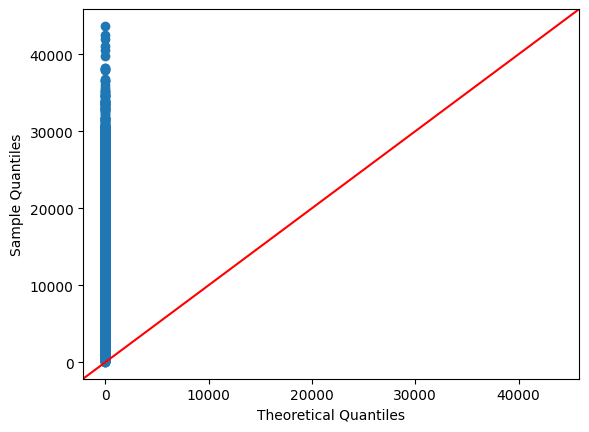

In [63]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

sm.qqplot(df['total_debt_outstanding'], line ='45')
plt.show()

In [64]:
from scipy.stats import anderson

result = anderson(df['income'], dist='norm')
print("Statistic:", result.statistic)
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print(f"At {sl}% level, data looks normal (statistic < critical value).")
    else:
        print(f"At {sl}% level, data does not look normal (statistic > critical value).")


Statistic: 0.35578474494650436
At 15.0% level, data looks normal (statistic < critical value).
At 10.0% level, data looks normal (statistic < critical value).
At 5.0% level, data looks normal (statistic < critical value).
At 2.5% level, data looks normal (statistic < critical value).
At 1.0% level, data looks normal (statistic < critical value).


*Commentaires*  
Les valeurs critiques √† chaque niveau de signification indiquent que la statistique de test est inf√©rieure √† chaque seuil, ce qui permet de conclure √† la normalit√© de la distribution de income √† ces niveaux de confiance.  
Le test d'Anderson-Darling est particuli√®rement utile pour √©valuer la normalit√© sur l'ensemble de la distribution, en mettant un poids suppl√©mentaire sur les queues. Le fait que la statistique de test soit inf√©rieure √† toutes les valeurs critiques sugg√®re fortement que income suit une distribution normale.

In [65]:
from scipy.stats import anderson

result = anderson(df['fico_score'], dist='norm')
print("Statistic:", result.statistic)
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print(f"At {sl}% level, data looks normal (statistic < critical value).")
    else:
        print(f"At {sl}% level, data does not look normal (statistic > critical value).")


Statistic: 1.1106138238919812
At 15.0% level, data does not look normal (statistic > critical value).
At 10.0% level, data does not look normal (statistic > critical value).
At 5.0% level, data does not look normal (statistic > critical value).
At 2.5% level, data does not look normal (statistic > critical value).
At 1.0% level, data does not look normal (statistic > critical value).


*Commentaires*  

En utilisant la fonction train_test_split de scikit-learn avec l'option stratify=y pour diviser les donn√©es en ensembles d'entra√Ænement et de test tout en maintenant la proportion des classes.
Les distributions des donn√©es d'entra√Ænement et de tests montrent que la proportion des classes est presque identique dans les ensembles d'entra√Ænement et de test, ce qui signifie que la stratification a fonctionn√© correctement pour g√©rer le d√©s√©quilibre des classes.

Model Engineering

arbre de d√©cision

*Commentaires*  
L'arbre de d√©cision impl√©mente une approche de mod√©lisation utilisant un arbre de d√©cision pour pr√©dire une variable cible binaire, *default*, qui indique probablement si un client va faire d√©faut sur un pr√™t ou non. L'arbre de d√©cision est un choix populaire pour les probl√®mes de classification en raison de sa facilit√© d'interpr√©tation, de sa capacit√© √† g√©rer des relations non lin√©aires, et de sa robustesse face aux variables num√©riques qui ne suivent pas une distribution normale.

In [66]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Entra√Ænement du mod√®le Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Pr√©diction et √©valuation du mod√®le
y_pred = decision_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Affichage des r√©sultats
print("Accuracy of the model:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)


Accuracy of the model: 0.9834355828220859
Confusion Matrix:
 [[1599   31]
 [  23 1607]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      1630
           1       0.98      0.99      0.98      1630

    accuracy                           0.98      3260
   macro avg       0.98      0.98      0.98      3260
weighted avg       0.98      0.98      0.98      3260



In [67]:
from sklearn.metrics import classification_report

# Pr√©diction et √©valuation du mod√®le
y_pred = decision_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

# Affichage des r√©sultats
print("Accuracy of the model:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

# Affichage d√©taill√© du rapport de classification
print("Detailed Classification Report:")
for label, metrics in report.items():
    if isinstance(metrics, dict):  # V√©rifie que l'√©l√©ment est un dictionnaire de m√©triques
        print(f"Class {label}:")
        print(f" Precision: {metrics['precision']:.2f}")
        print(f" Recall: {metrics['recall']:.2f}")
        print(f" F1-Score: {metrics['f1-score']:.2f}")


Accuracy of the model: 0.9834355828220859
Confusion Matrix:
 [[1599   31]
 [  23 1607]]
Detailed Classification Report:
Class 0:
 Precision: 0.99
 Recall: 0.98
 F1-Score: 0.98
Class 1:
 Precision: 0.98
 Recall: 0.99
 F1-Score: 0.98
Class macro avg:
 Precision: 0.98
 Recall: 0.98
 F1-Score: 0.98
Class weighted avg:
 Precision: 0.98
 Recall: 0.98
 F1-Score: 0.98


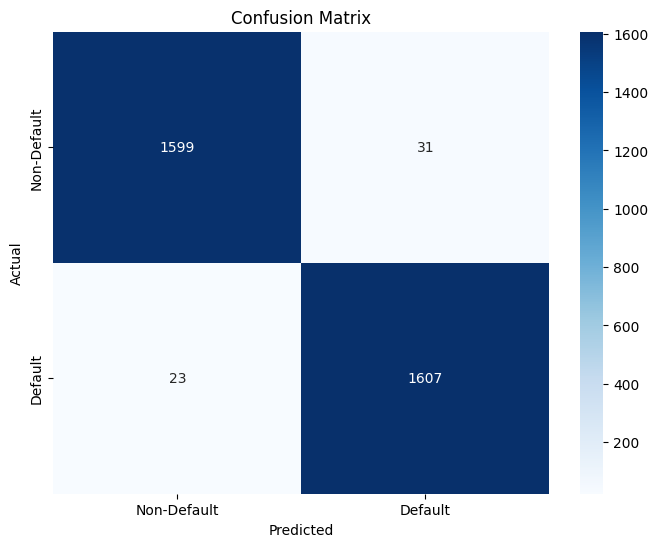

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pr√©diction et √©valuation du mod√®le
y_pred = decision_tree.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualisation de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=['Non-Default', 'Default'], yticklabels=['Non-Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [69]:
import pandas as pd
from sklearn.metrics import classification_report

# Calcul et r√©cup√©ration du rapport de classification sous forme de dictionnaire
report = classification_report(y_test, y_pred, output_dict=True)

# Conversion du dictionnaire en DataFrame pour une meilleure pr√©sentation
report_df = pd.DataFrame(report).transpose()

# Affichage du tableau des m√©triques
print(report_df[['precision', 'recall', 'f1-score']])


              precision    recall  f1-score
0              0.985820  0.980982  0.983395
1              0.981074  0.985890  0.983476
accuracy       0.983436  0.983436  0.983436
macro avg      0.983447  0.983436  0.983435
weighted avg   0.983447  0.983436  0.983435


In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Configuration de GridSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}
dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', verbose=1)

# Entra√Ænement de GridSearchCV
grid_search.fit(X_train, y_train)

# Meilleur mod√®le et param√®tres
print("Meilleurs param√®tres:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# √âvaluation sur l'ensemble de test
y_pred = best_model.predict(X_test)
print("Classification Report pour le meilleur mod√®le:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Meilleurs param√®tres: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Classification Report pour le meilleur mod√®le:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      1630
           1       0.98      0.99      0.98      1630

    accuracy                           0.98      3260
   macro avg       0.98      0.98      0.98      3260
weighted avg       0.98      0.98      0.98      3260



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1630
           1       1.00      1.00      1.00      1630

    accuracy                           1.00      3260
   macro avg       1.00      1.00      1.00      3260
weighted avg       1.00      1.00      1.00      3260



<Figure size 1500x500 with 0 Axes>

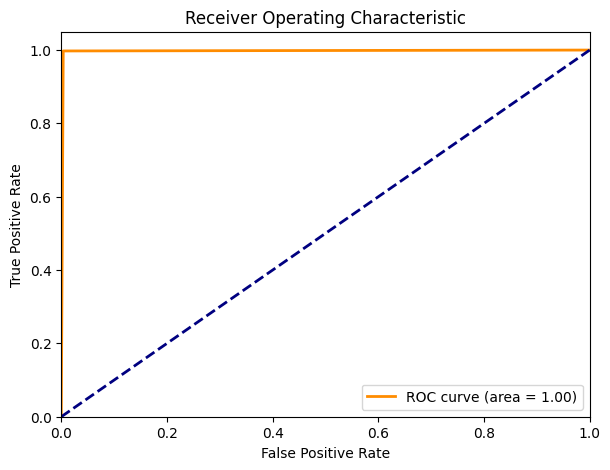

In [71]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns


# Fonction de binning pour years_employed
def bin_years_employed(years):
    if years <= 2:
        return '0-2 years'
    elif years <= 5:
        return '3-5 years'
    elif years <= 8:
        return '6-8 years'
    else:
        return '9+ years'

# Pr√©parer les donn√©es
X = df.drop('default', axis=1)
y = df['default']

# Encoder les variables cat√©gorielles
onehot_encoder = OneHotEncoder(handle_unknown='ignore')
X_encoded = pd.DataFrame(onehot_encoder.fit_transform(X[['credit_lines_outstanding', 'years_employed']]).toarray())
X_encoded.columns = onehot_encoder.get_feature_names_out(['credit_lines_outstanding', 'years_employed'])
X = X.drop(['credit_lines_outstanding', 'years_employed'], axis=1).reset_index(drop=True)
X = pd.concat([X, X_encoded], axis=1)

# Appliquer SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Diviser les donn√©es en ensembles d'entra√Ænement et de test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42)

# Cr√©er le mod√®le d'arbre de d√©cision
tree_model = DecisionTreeClassifier(random_state=42)

# Validation crois√©e avec StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(tree_model, X_train, y_train, cv=skf, scoring='accuracy')

# Entra√Æner le mod√®le sur toutes les donn√©es d'entra√Ænement
tree_model.fit(X_train, y_train)

# Pr√©dictions sur l'ensemble de test
y_pred = tree_model.predict(X_test)
y_pred_proba = tree_model.predict_proba(X_test)[:, 1]

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Visualisation
plt.figure(figsize=(15, 5))

# Courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Visualisation
plt.figure(figsize=(15, 5))

# Courbe ROC
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Ligne diagonale pour le hasard
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.base import BaseEstimator, TransformerMixin
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline


numerical_vars = ['loan_amt_outstanding', 'total_debt_outstanding', 'income', 'fico_score']
categorical_vars = ['credit_lines_outstanding', 'years_employed']
target_var = 'default'

class RatioFeatures(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = pd.DataFrame(X)  # convertir en DataFrame
        X['loan_to_income_ratio'] = X['loan_amt_outstanding'] / X['income']
        X['debt_to_income_ratio'] = X['total_debt_outstanding'] / X['income']
        return X

numeric_transformer = Pipeline(steps=[
    ('ratio', RatioFeatures()),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_vars),
        ('cat', categorical_transformer, categorical_vars)
    ])

tree_model = DecisionTreeClassifier(random_state=42)

clf = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('sampling', SMOTE()),
    ('classifier', tree_model)
])

X = df.drop(target_var, axis=1)
y = df[target_var]

# Calcul des poids pour chaque classe bas√© sur leur fr√©quence
weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
class_weights = dict(zip(np.unique(y), weights))
clf.named_steps['classifier'].set_params(class_weight=class_weights)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

param_grid = {
    'classifier__max_depth': [10, 20, 30, None],
    'classifier__min_samples_split': [2, 10, 20],
    'classifier__min_samples_leaf': [1, 5, 10]
}

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

print("Meilleurs param√®tres:", grid_search.best_params_)
print("Meilleur score cross-validated:", grid_search.best_score_)

y_pred = grid_search.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Meilleurs param√®tres: {'classifier__max_depth': 20, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}
Meilleur score cross-validated: 0.9915

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1630
           1       0.96      0.97      0.97       370

    accuracy                           0.99      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.99      0.99      0.99      2000

Accuracy: 0.9875


- mod√®le 2 : for√™ts al√©atoires


Shape of X_train: (8000, 6)
Shape of X_test: (2000, 6)
Shape of y_train: (8000,)
Shape of y_test: (2000,)

Distribution de la target dans y_train:
default
0    0.814875
1    0.185125
Name: proportion, dtype: float64

Distribution de la target dans y_test:
default
0    0.815
1    0.185
Name: proportion, dtype: float64

Rapport de classification:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1630
           1       0.99      0.99      0.99       370

    accuracy                           1.00      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       1.00      1.00      1.00      2000

AUC-ROC: 0.9998665229646825


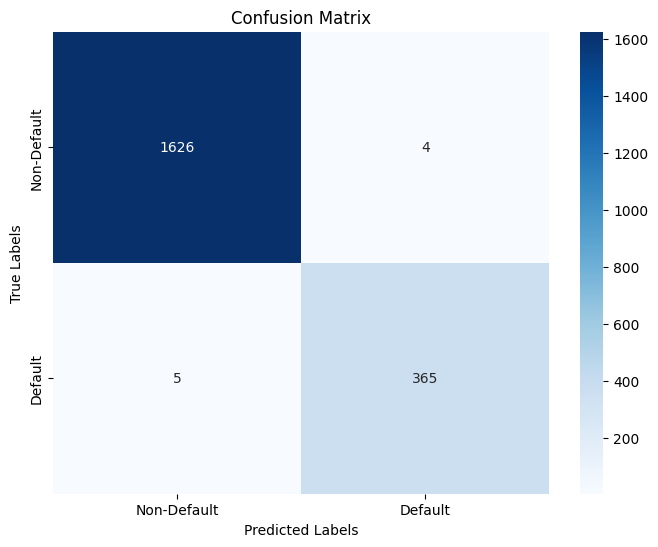

In [73]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# S√©parer les features (X) et la target (y)
X = df.drop('default', axis=1)
y = df['default']

# Diviser les donn√©es en ensembles d'entra√Ænement et de test en stratifiant par la target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# V√©rification des shapes pour s'assurer que la segmentation s'est bien d√©roul√©e
print("\nShape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# V√©rifier la distribution des classes dans les ensembles d'entra√Ænement et de test
print("\nDistribution de la target dans y_train:")
print(y_train.value_counts(normalize=True))
print("\nDistribution de la target dans y_test:")
print(y_test.value_counts(normalize=True))

# Ajuster les poids des classes pour les for√™ts al√©atoires
class_weights = {0: 1, 1: len(y_train[y_train==0]) / len(y_train[y_train==1])}

# Cr√©er le mod√®le de for√™ts al√©atoires avec les poids ajust√©s
rf = RandomForestClassifier(class_weight=class_weights, random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

# Pr√©dictions et √©valuation
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:, 1]

# Rapport de classification
print("\nRapport de classification:")
print(classification_report(y_test, y_pred))

# AUC-ROC
print("AUC-ROC:", roc_auc_score(y_test, y_pred_proba))

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualisation de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=['Non-Default', 'Default'], yticklabels=['Non-Default', 'Default'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [74]:
from sklearn.model_selection import train_test_split, cross_val_score

# S√©paration en ensembles d'entra√Ænement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Application de la validation crois√©e
scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')  # Utilisation de 5-folds CV

# Affichage des r√©sultats de la validation crois√©e
print("Accuracy scores for each fold are:", scores)
print("Mean cross-validation score: {:.2f}".format(scores.mean()))


Accuracy scores for each fold are: [0.996  0.998  0.995  0.996  0.9955]
Mean cross-validation score: 1.00


In [75]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# D√©finition du g√©n√©rateur de plis stratifi√©s
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Validation crois√©e avec 5 plis en utilisant le scoring AUC-ROC
scores = cross_val_score(rf, X, y, cv=cv, scoring='roc_auc')

# Affichage du score AUC-ROC moyen sur les 5 plis de validation crois√©e
print("\nAUC-ROC moyen sur 5 plis de validation crois√©e:", np.mean(scores))


AUC-ROC moyen sur 5 plis de validation crois√©e: 0.9997935206217899


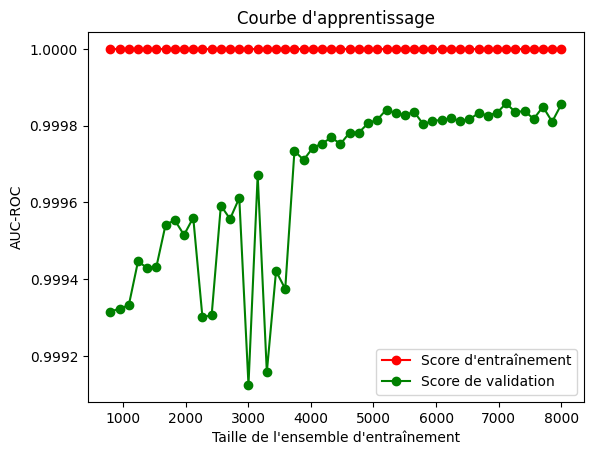

In [76]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(rf, X, y, cv=5, scoring='roc_auc', train_sizes=np.linspace(0.1, 1.0, 50))

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Score d\'entra√Ænement')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Score de validation')
plt.xlabel('Taille de l\'ensemble d\'entra√Ænement')
plt.ylabel('AUC-ROC')
plt.legend(loc='best')
plt.title('Courbe d\'apprentissage')
plt.show()

Fitting 3 folds for each of 20 candidates, totalling 60 fits

Rapport de classification:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1630
           1       0.99      0.99      0.99       370

    accuracy                           1.00      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       1.00      1.00      1.00      2000

AUC-ROC: 0.9998764715635882


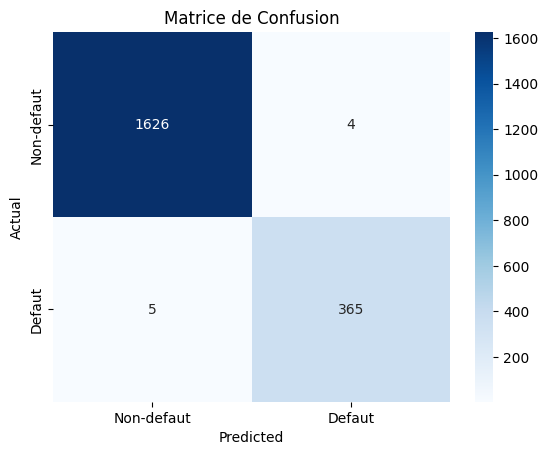

In [77]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# S√©parer les features (X) et la target (y)
X = df.drop('default', axis=1)
y = df['default']

# Diviser les donn√©es en ensembles d'entra√Ænement et de test en stratifiant par la target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# D√©finir les hyperparam√®tres pour la recherche al√©atoire
param_distributions = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Cr√©er le mod√®le de for√™ts al√©atoires avec les poids ajust√©s
class_weights = {0: 1, 1: len(y_train[y_train==0]) / len(y_train[y_train==1])}
rf = RandomForestClassifier(class_weight=class_weights, random_state=42)

# Configurer RandomizedSearchCV
random_search = RandomizedSearchCV(rf, param_distributions, n_iter=20, scoring='roc_auc', cv=3, verbose=1, random_state=42, n_jobs=-1)

# Ex√©cuter la recherche al√©atoire
random_search.fit(X_train, y_train)

# Meilleur mod√®le trouv√©
best_rf = random_search.best_estimator_

# Pr√©dictions et √©valuation avec le meilleur mod√®le
y_pred = best_rf.predict(X_test)
y_pred_proba = best_rf.predict_proba(X_test)[:, 1]

# Rapport de classification et AUC-ROC
print("\nRapport de classification:")
print(classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_proba))

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-defaut', 'Defaut'], yticklabels=['Non-defaut', 'Defaut'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matrice de Confusion')
plt.show()


- mod√®le 3 : La r√©gression logistique


Shape of X_train: (8000, 6)
Shape of X_test: (2000, 6)
Shape of y_train: (8000,)
Shape of y_test: (2000,)

Distribution de la target dans y_train:
default
0    0.814875
1    0.185125
Name: proportion, dtype: float64

Distribution de la target dans y_test:
default
0    0.815
1    0.185
Name: proportion, dtype: float64

Rapport de classification:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1630
           1       0.98      1.00      0.99       370

    accuracy                           1.00      2000
   macro avg       0.99      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000


Matrice de confusion:
[[1624    6]
 [   0  370]]

AUC-ROC Score:
0.9999867352014592

Coefficients du mod√®le:
                    feature  coefficient
0  credit_lines_outstanding    12.107252
2    total_debt_outstanding     4.911530
4            years_employed    -4.030255
3                    income    -3.070236
5        

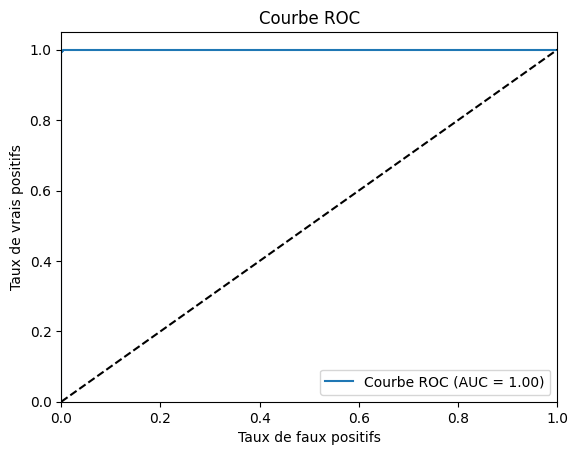

In [78]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt

# S√©parer les features (X) et la target (y)
X = df.drop('default', axis=1)
y = df['default']

# Diviser les donn√©es en ensembles d'entra√Ænement et de test en stratifiant par la target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# V√©rification des shapes pour s'assurer que la segmentation s'est bien d√©roul√©e
print("\nShape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# V√©rifier la distribution des classes dans les ensembles d'entra√Ænement et de test
print("\nDistribution de la target dans y_train:")
print(y_train.value_counts(normalize=True))
print("\nDistribution de la target dans y_test:")
print(y_test.value_counts(normalize=True))

# Standardisation des features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Calculer les poids des classes
class_weights = dict(zip(np.unique(y), y.value_counts(normalize=True)))
class_weights = {k: 1/v for k, v in class_weights.items()}

# Cr√©er et entra√Æner le mod√®le de r√©gression logistique avec les poids ajust√©s
log_reg = LogisticRegression(class_weight=class_weights, random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Faire des pr√©dictions
y_pred = log_reg.predict(X_test_scaled)
y_pred_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

# √âvaluer le mod√®le
print("\nRapport de classification:")
print(classification_report(y_test, y_pred))

print("\nMatrice de confusion:")
print(confusion_matrix(y_test, y_pred))

print("\nAUC-ROC Score:")
print(roc_auc_score(y_test, y_pred_proba))

# Afficher les coefficients du mod√®le
coefficients = pd.DataFrame({'feature': X.columns, 'coefficient': log_reg.coef_[0]})
coefficients = coefficients.sort_values('coefficient', key=abs, ascending=False)
print("\nCoefficients du mod√®le:")
print(coefficients)

# Tracer la courbe ROC
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label='Courbe ROC (AUC = %0.2f)' % roc_auc_score(y_test, y_pred_proba))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()


Shape of X_train: (8000, 6)
Shape of X_test: (2000, 6)
Shape of y_train: (8000,)
Shape of y_test: (2000,)

Distribution de la target dans y_train:
default
0    0.814875
1    0.185125
Name: proportion, dtype: float64

Distribution de la target dans y_test:
default
0    0.815
1    0.185
Name: proportion, dtype: float64
Fitting 5 folds for each of 8 candidates, totalling 40 fits

Meilleurs param√®tres: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}

Rapport de classification:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1630
           1       0.99      1.00      0.99       370

    accuracy                           1.00      2000
   macro avg       0.99      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000


Matrice de confusion:
[[1626    4]
 [   0  370]]

AUC-ROC Score:
0.9999933676007297

Coefficients du mod√®le:
                    feature  coefficient
0  credit_lines_outstanding    38.8272

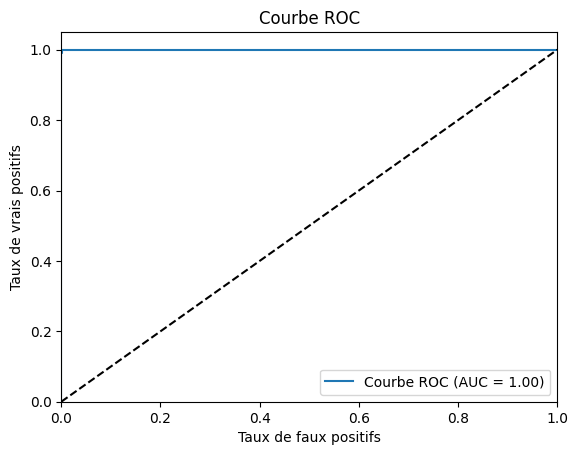

In [80]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# S√©parer les features (X) et la target (y)
X = df.drop('default', axis=1)
y = df['default']

# Diviser les donn√©es en ensembles d'entra√Ænement et de test en stratifiant par la target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# V√©rification des shapes pour s'assurer que la segmentation s'est bien d√©roul√©e
print("\nShape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# V√©rifier la distribution des classes dans les ensembles d'entra√Ænement et de test
print("\nDistribution de la target dans y_train:")
print(y_train.value_counts(normalize=True))
print("\nDistribution de la target dans y_test:")
print(y_test.value_counts(normalize=True))

# Standardisation des features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Calculer les poids des classes
class_weights = dict(zip(np.unique(y), y.value_counts(normalize=True)))
class_weights = {k: 1/v for k, v in class_weights.items()}

# D√©finir les hyperparam√®tres √† optimiser
param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Cr√©er le mod√®le de r√©gression logistique avec les poids ajust√©s
log_reg = LogisticRegression(class_weight=class_weights, random_state=42, max_iter=1000)

# Utiliser GridSearchCV pour l'optimisation des hyperparam√®tres
grid_search = GridSearchCV(log_reg, param_grid, cv=StratifiedKFold(n_splits=5), scoring='roc_auc', verbose=2, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Meilleurs param√®tres
print("\nMeilleurs param√®tres:", grid_search.best_params_)

# Entra√Æner le mod√®le avec les meilleurs param√®tres
best_log_reg = grid_search.best_estimator_

# Faire des pr√©dictions
y_pred = best_log_reg.predict(X_test_scaled)
y_pred_proba = best_log_reg.predict_proba(X_test_scaled)[:, 1]

# √âvaluer le mod√®le
print("\nRapport de classification:")
print(classification_report(y_test, y_pred))

print("\nMatrice de confusion:")
print(confusion_matrix(y_test, y_pred))

print("\nAUC-ROC Score:")
print(roc_auc_score(y_test, y_pred_proba))

# Afficher les coefficients du mod√®le
coefficients = pd.DataFrame({'feature': X.columns, 'coefficient': best_log_reg.coef_[0]})
coefficients = coefficients.sort_values('coefficient', key=abs, ascending=False)
print("\nCoefficients du mod√®le:")
print(coefficients)

# Tracer la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label='Courbe ROC (AUC = %0.2f)' % roc_auc_score(y_test, y_pred_proba))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()

**Conclusion**  

**1. Interpr√©tabilit√© et Explicabilit√©**    
La r√©gression logistique, √©tant un mod√®le lin√©aire, offre une grande transparence sur la fa√ßon dont les pr√©dictions sont faites. Les coefficients du mod√®le peuvent √™tre examin√©s pour comprendre l'influence de chaque feature sur la pr√©diction, permettant une analyse et des ajustements faciles.  

**2. Simplicit√© et Efficacit√©**    
La r√©gression logistique est moins co√ªteuse en termes de ressources informatiques par rapport √† des mod√®les plus complexes. Elle est rapide √† entra√Æner et √† d√©ployer, ce qui la rend id√©ale pour des environnements de production o√π les ressources ou la capacit√© de calcul sont des consid√©rations importantes.  

**3. Performances Comparables**    
La r√©gression logistique offre des performances comparables (en termes de pr√©cision, AUC-ROC, etc.) √† des mod√®les plus complexes, cela justifie le choix de la simplicit√© sur la complexit√©. Selon le principe du rasoir d'Occam en science et en philosophie, si deux mod√®les offrent des performances similaires, la solution la plus simple est g√©n√©ralement pr√©f√©rable.  

**4. Facilit√© de Mise en ≈íuvre et de Maintenance**    
La r√©gression logistique est g√©n√©ralement plus facile √† mettre en ≈ìuvre et √† maintenir en raison de sa simplicit√©. Les mod√®les plus complexes peuvent n√©cessiter un tuning fin des hyperparam√®tres et une configuration plus d√©licate, augmentant les co√ªts de maintenance et le risque d'erreurs lors des mises √† jour ou des changements.  

**5. Robustesse aux Petites Variations des Donn√©es**   
La r√©gression logistique est souvent moins sensibles aux petites variations des donn√©es que les mod√®les plus complexes, ce qui peut √™tre un avantage si les donn√©es de production peuvent diff√©rer l√©g√®rement des donn√©es d'entra√Ænement.  

**6. Facilit√© de D√©ploiement**  
D√©ployer un mod√®le de r√©gression logistique dans des syst√®mes de production est g√©n√©ralement plus simple, car il n√©cessite moins de d√©pendances et peut facilement √™tre int√©gr√© dans diff√©rents environnements informatiques, y compris des syst√®mes bas√©s sur le cloud ou des applications mobiles.

In [86]:
# Importation des biblioth√®ques n√©cessaires
import pickle
import mlflow
import mlflow.sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# ---- Configuration initiale de MLflow ----
mlflow.set_tracking_uri("http://127.0.0.1:8080")
mlflow.set_experiment("Logistic_Regression")

# ---- Pr√©paration des donn√©es ----
# Supposons que X et y sont d√©j√† d√©finis et pr√©par√©s pour l'entra√Ænement
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# ---- Configuration du mod√®le ----
params = {
    "penalty": "l1",
    "solver": "liblinear",
    "class_weight": "balanced",
    "max_iter": 1000,
    "random_state": 42,
}

# ---- Entra√Ænement du mod√®le ----
logistic_model = LogisticRegression(**params)
logistic_model.fit(X_train, y_train)

# ---- √âvaluation du mod√®le ----
y_pred = logistic_model.predict(X_val)
metrics = {
    "accuracy": accuracy_score(y_val, y_pred),
    "precision": precision_score(y_val, y_pred, average='binary'),
    "recall": recall_score(y_val, y_pred, average='binary'),
    "f1_score": f1_score(y_val, y_pred, average='binary'),
}

# ---- Enregistrement et suivi du mod√®le avec MLflow ----
with mlflow.start_run():
    mlflow.log_params(params)
    mlflow.log_metrics(metrics)
    mlflow.sklearn.log_model(logistic_model, "model", registered_model_name="LogisticRegressionModel")

    # ---- Sauvegarde du mod√®le en local avec Pickle ----
    model_path = "logistic_model.pkl"
    with open(model_path, 'wb') as file:
        pickle.dump(logistic_model, file)

    print(f"Mod√®le enregistr√© sous {model_path}")

    # ---- Enregistrement de l'artefact mod√®le dans MLflow ----
    mlflow.log_artifact(model_path)

# Lancer l'application Flask si n√©cessaire pour faire des pr√©dictions
if __name__ == "__main__":
    from flask import Flask, request, jsonify
    app = Flask(__name__)

    @app.route('/predict', methods=['POST'])
    def predict():
        data = request.get_json()
        df = pd.DataFrame([data])
        prediction = logistic_model.predict(df)
        return jsonify({'prediction': int(prediction[0])})

    app.run(host='127.0.0.1', port=8080)


2024/09/29 10:17:21 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'LogisticRegressionModel' already exists. Creating a new version of this model...
2024/09/29 10:17:21 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: LogisticRegressionModel, version 2
Created version '2' of model 'LogisticRegressionModel'.
2024/09/29 10:17:21 INFO mlflow.tracking._tracking_service.client: üèÉ View run unequaled-wren-473 at: http://127.0.0.1:8080/#/experiments/180267382028518630/runs/f68c1504cc3b4ccd9da2ed3a754e9da2.
2024/09/29 10:17:21 INFO mlflow.tracking._tracking_service.client: üß™ View experiment at: http://127.0.0.1:8080/#/experiments/180267382028518630.


Mod√®le enregistr√© sous logistic_model.pkl
 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:8080
Press CTRL+C to quit
